In [1]:
import os
os.chdir('JQ/PI-SDE')
import pandas as pd
import torch
import matplotlib.pyplot as plt
from types import SimpleNamespace
import numpy as np
from src.evaluation import derive_model

from joblib import load
um = load('data/Veres/alltime/um_transformer.joblib')

In [4]:
path = "RESULTS/alltime/softplus-400_400-0.5-const-0.1-0.1-0.005/seed_0/config.pt"
config = SimpleNamespace(**torch.load(path))
model, x, y, device = derive_model(config, ckpt_name = 'epoch_003000')

x_all = torch.cat(x)
x_all_2dim = um.transform(x_all.cpu().numpy())

In [5]:
np.random.seed(42)
sample_num = 50

Samples = []
for ii, t in enumerate(y):
    N = x[ii].shape[0]
    Index = np.random.choice(range(N), sample_num,replace=False)
    if ii==0:
        Index_t0 = Index
    X = x[ii][Index]
    t = (((torch.ones(sample_num)) * t).unsqueeze(1))
    Xt = torch.cat([X, t], dim=1).to(device)
    Samples.append(Xt)

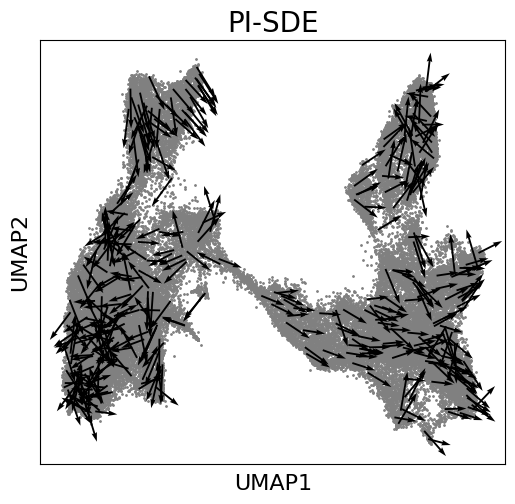

In [6]:
fig, ax = plt.subplots(figsize = (6,5.5))

ax.scatter(x_all_2dim[:,0], x_all_2dim[:,1], s = 1, color = 'gray')

ii = 0
for Xt in Samples:
    X_start = Xt[:,0:-1]
    X_end = X_start  + model._func._drift(Xt)
    x_end_umap = um.transform(X_end.detach().cpu().numpy())
    x_start_umap = um.transform(X_start.detach().cpu().numpy())
    xv = x_end_umap - x_start_umap
    xv = xv / np.linalg.norm(xv, axis = 1)[:,np.newaxis] * 1.5

    ax.quiver(x_start_umap[:,0],  x_start_umap[:,1], xv[:,0], xv[:,1], scale = 1.5, scale_units = 'xy', 
        width = .004)
    ii=ii+1
ax.set_xlabel('UMAP1',fontsize=16)
ax.set_ylabel('UMAP2',fontsize=16)

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('PI-SDE', fontsize=20)
plt.show()